### Necessary Packages

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,recall_score,precision_score
import warnings
warnings.filterwarnings('ignore')

### Data Preparation

In [2]:
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 199s 1us/step


In [3]:
X_train = tf.convert_to_tensor(np.float32(X_train))
y_train = tf.convert_to_tensor(y_train)
X_test = tf.convert_to_tensor(np.float32(X_test))
y_test = tf.convert_to_tensor(y_test)

In [4]:
print(f"X_train.shape = {X_train.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"X_test.shape = {X_test.shape}")
print(f"y_test.shape = {y_test.shape}")

X_train.shape = (50000, 32, 32, 3)
y_train.shape = (50000, 1)
X_test.shape = (10000, 32, 32, 3)
y_test.shape = (10000, 1)


### Data Normalization

In [6]:
X_train, X_test = X_train / 255.0, X_test / 255.0

### Define the architecture

In [7]:
def create_model_0() -> tf.keras.Model:

    model = tf.keras.Sequential(layers=[

        tf.keras.layers.Input(shape=(32,32,3)),

        tf.keras.layers.Conv2D(filters=16,kernel_size=3,padding='valid',activation=tf.keras.activations.relu),
        tf.keras.layers.Conv2D(filters=16,kernel_size=3,padding='valid',activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='valid',activation=tf.keras.activations.relu),
        tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='valid',activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(units=10,activation=tf.keras.activations.softmax)
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

    return model

In [8]:
model_0 = create_model_0()

In [9]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,666 (96.35 KB)

 Trainable params: 24,666 (96.35 KB)

 Non-trainable params: 0 (0.00 B)

### Training

In [10]:
history_0 = model_0.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test,y_test),
    batch_size=64,
    epochs=5,
)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 1.6179 - sparse_categorical_accuracy: 0.4100 - val_loss: 1.4344 - val_sparse_categorical_accuracy: 0.4899
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 1.3014 - sparse_categorical_accuracy: 0.5364 - val_loss: 1.3535 - val_sparse_categorical_accuracy: 0.5238
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 1.1600 - sparse_categorical_accuracy: 0.5908 - val_loss: 1.1156 - val_sparse_categorical_accuracy: 0.6075
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 1.0617 - sparse_categorical_accuracy: 0.6263 - val_loss: 1.0564 - val_sparse_categorical_accuracy: 0.6278
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.9971 - sparse_categorical_accuracy: 0.6502 - val_loss: 1.0295 - val_sparse_categorical_accuracy: 0.6373


### Trying another architecture

In [12]:
def create_model_1() -> tf.keras.Model:

    model = tf.keras.Sequential(layers=[

        tf.keras.layers.Conv2D(filters=64,kernel_size=(2,2),padding='valid',activation=tf.keras.activations.relu, input_shape=(32,32,3)),
        tf.keras.layers.Conv2D(filters=64,kernel_size=(2,2),padding='valid',activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),padding='valid',activation=tf.keras.activations.relu),
        tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),padding='valid',activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(units=158,activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(units=10,activation=tf.keras.activations.softmax)
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

    return model

In [13]:
model_1 = create_model_1()

In [14]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 31, 31, 64)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 158)            │       728,222 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,590 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 845,652 (3.23 MB)

 Trainable params: 845,652 (3.23 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history_1 = model_1.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test,y_test),
    batch_size=64,
    epochs=5
)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 80ms/step - loss: 1.4213 - sparse_categorical_accuracy: 0.4892 - val_loss: 1.1612 - val_sparse_categorical_accuracy: 0.5933
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - loss: 0.9774 - sparse_categorical_accuracy: 0.6598 - val_loss: 0.9154 - val_sparse_categorical_accuracy: 0.6807
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - loss: 0.7938 - sparse_categorical_accuracy: 0.7215 - val_loss: 0.8071 - val_sparse_categorical_accuracy: 0.7152
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - loss: 0.6669 - sparse_categorical_accuracy: 0.7673 - val_loss: 0.7487 - val_sparse_categorical_accuracy: 0.7392
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - loss: 0.5637 - sparse_categorical_accuracy: 0.8041 - val_loss: 0.7696 - val_sparse_categorical_accuracy: 0.7365


### Evaluation

In [16]:
def plot_learning_curve(history : tf.keras.callbacks.History):

  fig, (ax1, ax2) = plt.subplots(nrows=2)

  fig.set_size_inches(8,8)

  sns.lineplot(x=range(5), y=history.history["loss"], ax=ax1, label="Training Loss")
  sns.lineplot(x=range(5), y=history.history["val_loss"], ax=ax1, label="Validation Loss")

  sns.lineplot(x=range(5), y=history.history["sparse_categorical_accuracy"], ax=ax2, label="Training Accuracy")
  sns.lineplot(x=range(5), y=history.history["val_sparse_categorical_accuracy"], ax=ax2, label="Validation Accuracy")

In [17]:
def make_metric(metric,**kwargs):

    def _metric(y, y_hat):
        kwargs["y_true"] = y
        kwargs["y_pred"] = y_hat
        return metric(**kwargs)

    return _metric

In [18]:
metrics= {
    "accuracy" : accuracy_score,
    "precision_macro" : make_metric(precision_score, average="macro"),
    "precision_micro" : make_metric(precision_score, average="micro"),
    "recall_macro" : make_metric(recall_score, average="macro"),
    "recall_micro" : make_metric(recall_score, average="micro"),
    "f1_macro" : make_metric(f1_score, average="macro"),
    "f1_micro" : make_metric(f1_score, average="micro")
}

In [19]:
def compute_metrics(
    metrics : dict,
    y : np.ndarray,
    y_hat : np.ndarray
) -> pd.Series:

    results = {}

    for name, metric in metrics.items():
        results[name] = metric(y, y_hat)

    return pd.Series(results)

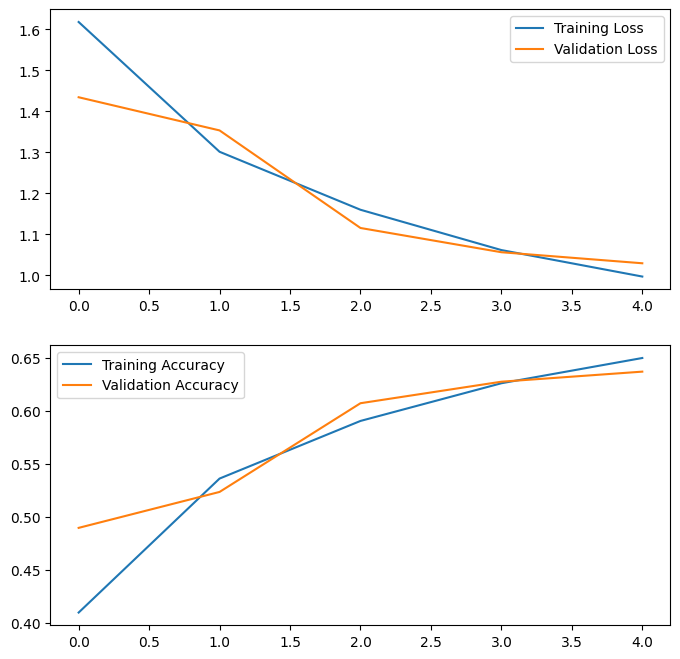

In [20]:
plot_learning_curve(history_0)

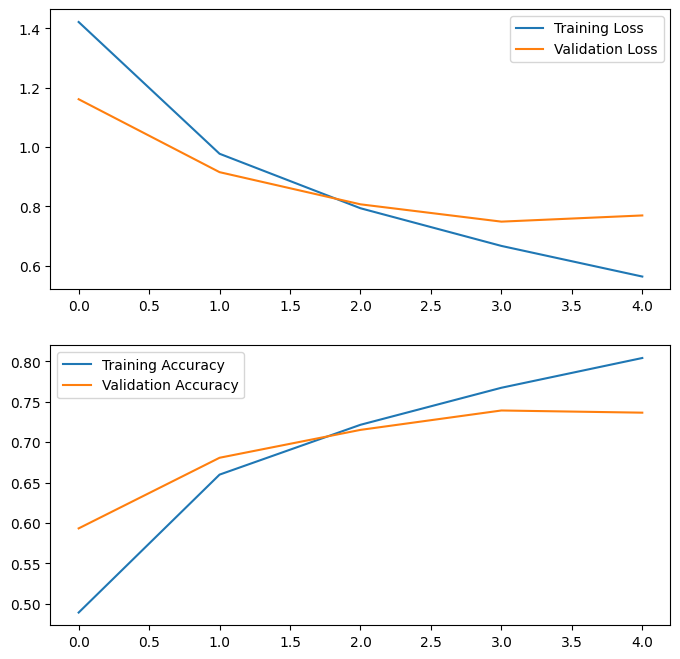

In [21]:
plot_learning_curve(history_1)

In [22]:
y_hat_0 = model_0.predict(X_test)
y_hat_0 = tf.argmax(y_hat_0, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [23]:
compute_metrics(metrics, y_test,y_hat_0)

accuracy           0.637300
precision_macro    0.649346
precision_micro    0.637300
recall_macro       0.637300
recall_micro       0.637300
f1_macro           0.639958
f1_micro           0.637300
dtype: float64

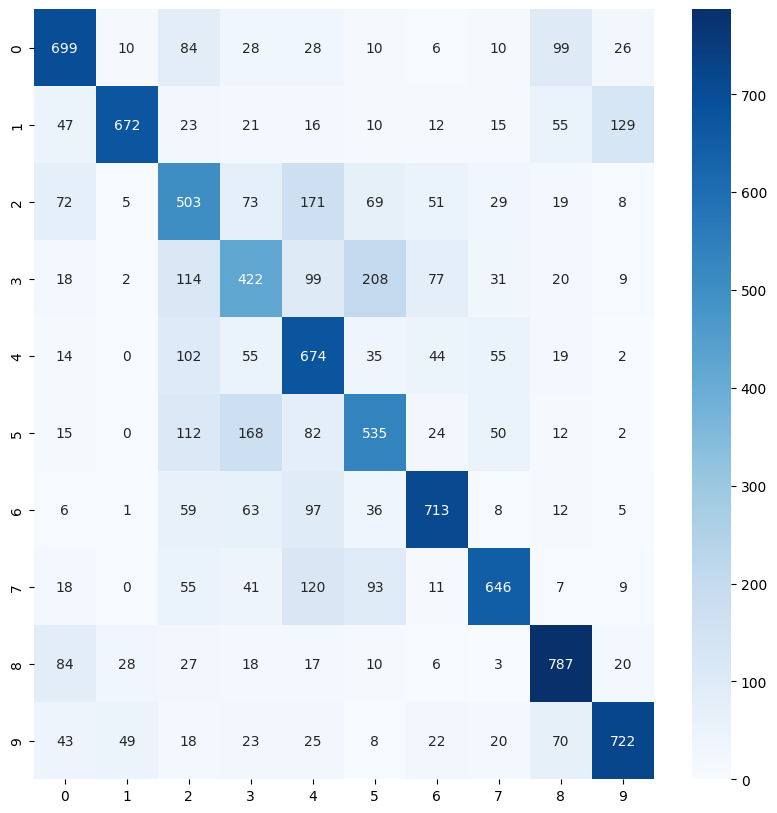

In [24]:
sns.heatmap(data=confusion_matrix(y_test,y_hat_0), annot=True, fmt=',d',cmap='Blues').get_figure().set_size_inches(10,10)

In [25]:
y_hat_1 = model_1.predict(X_test)
y_hat_1 = tf.argmax(y_hat_1, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [26]:
compute_metrics(metrics, y_test,y_hat_1)

accuracy           0.736500
precision_macro    0.746081
precision_micro    0.736500
recall_macro       0.736500
recall_micro       0.736500
f1_macro           0.738841
f1_micro           0.736500
dtype: float64

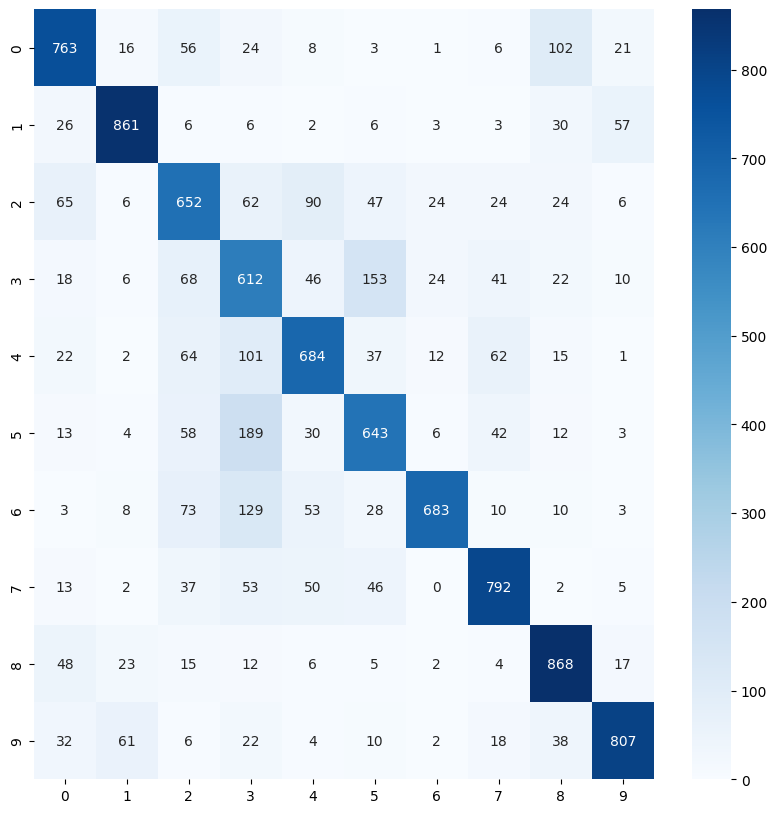

In [27]:
sns.heatmap(data=confusion_matrix(y_test,y_hat_1), annot=True, fmt=',d',cmap='Blues').get_figure().set_size_inches(10,10)